First 5 rows of the dataset:
  satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...           

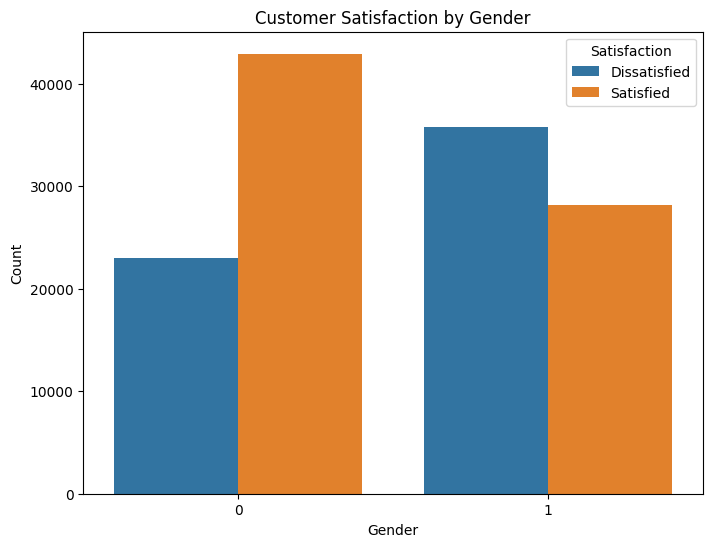

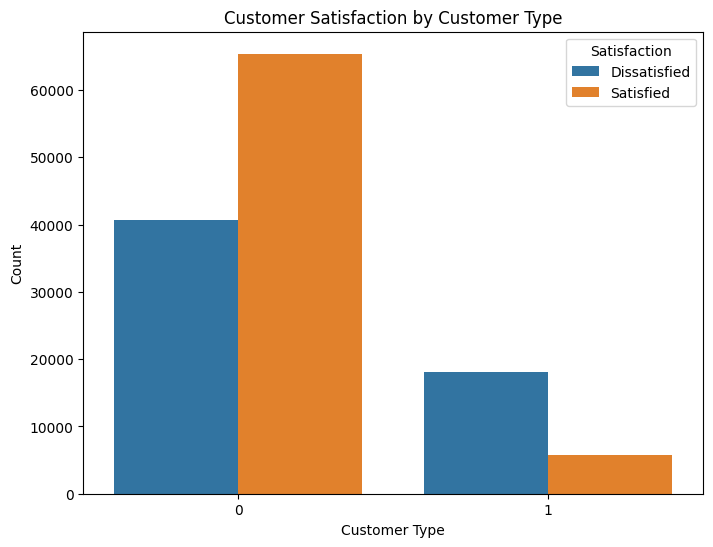

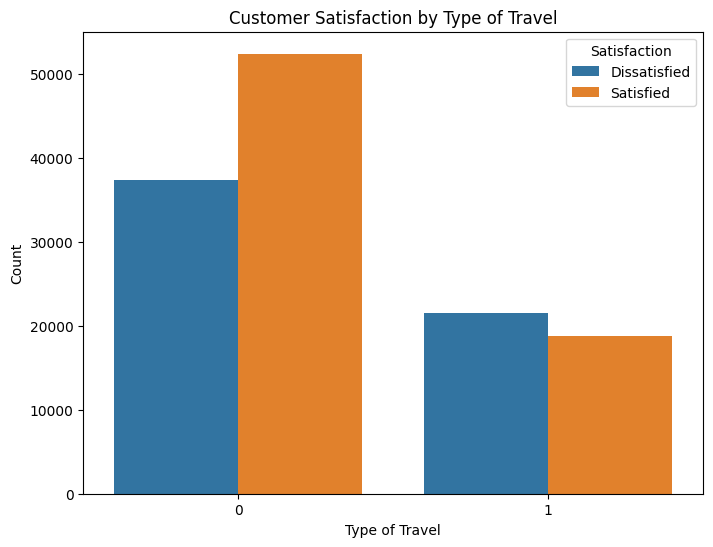

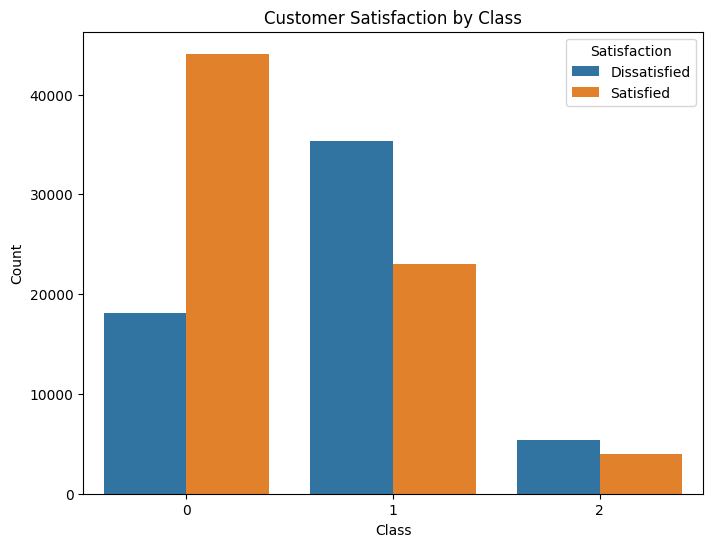

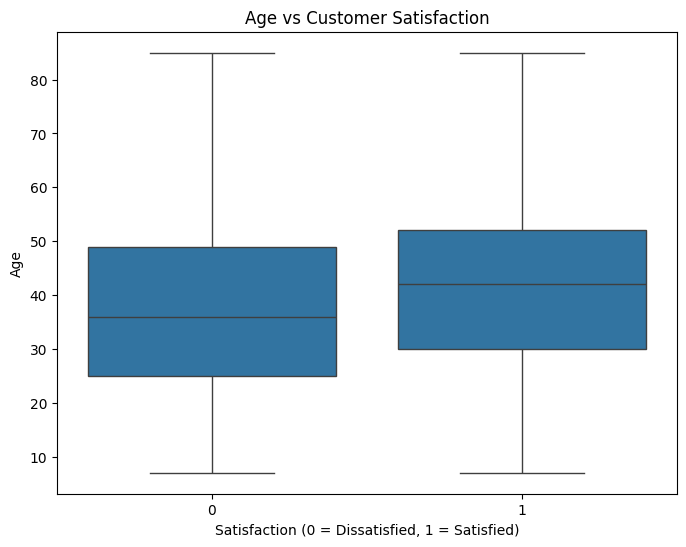

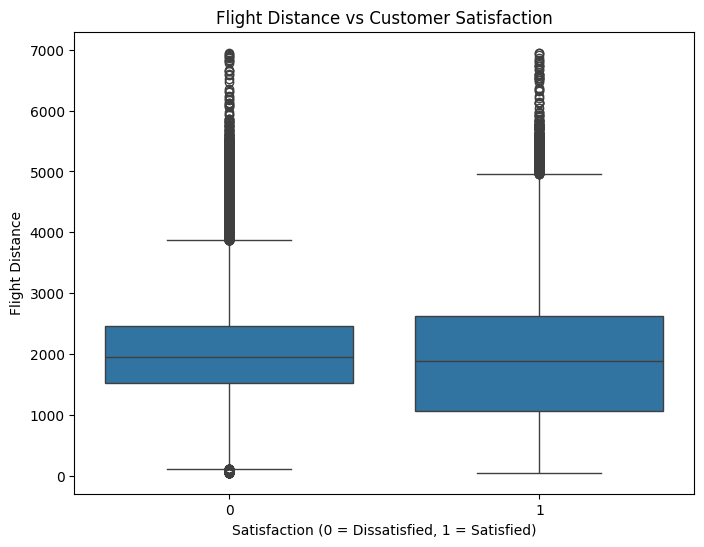

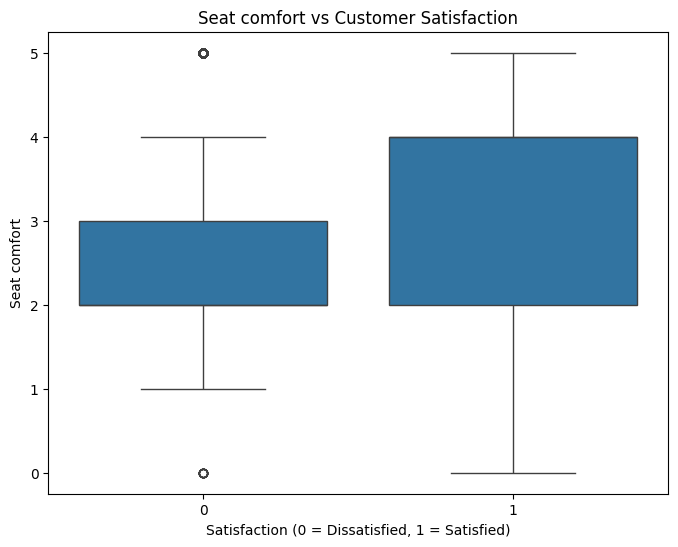

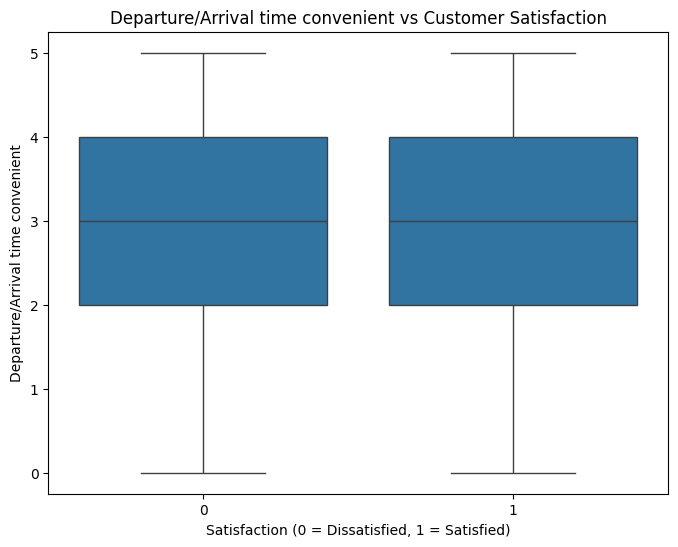

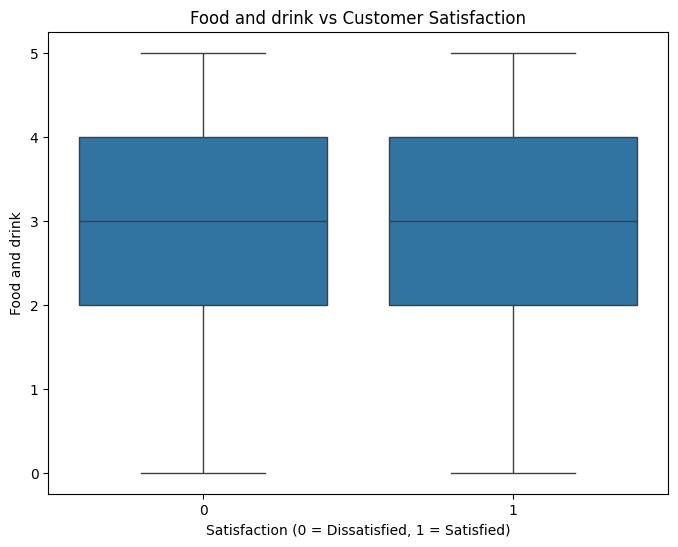

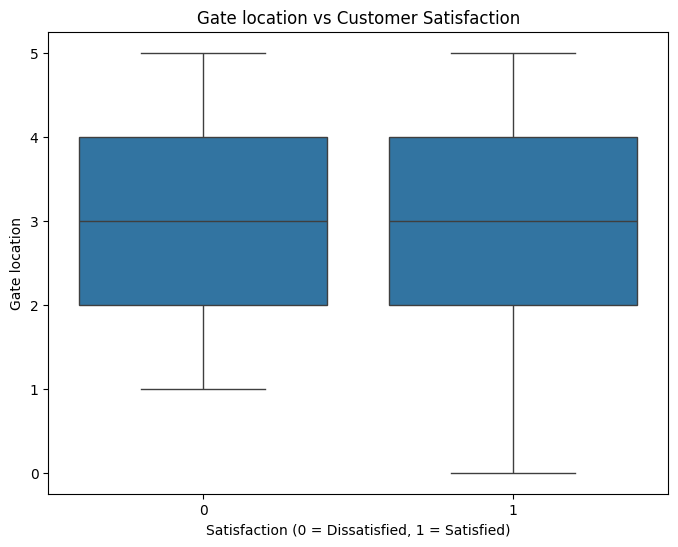

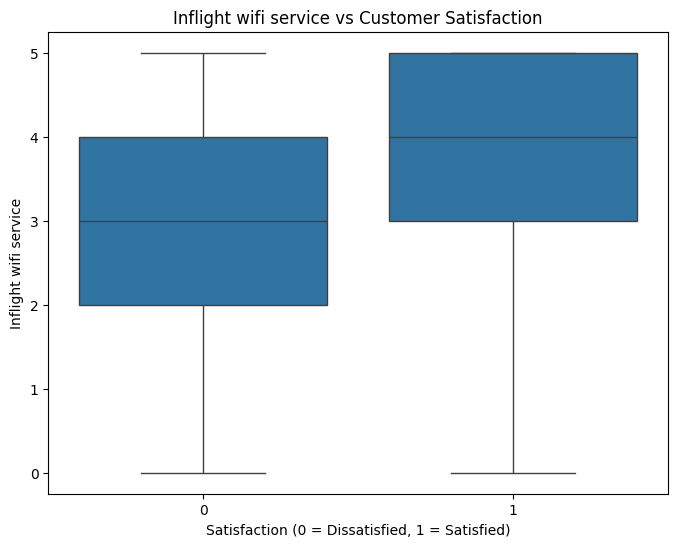

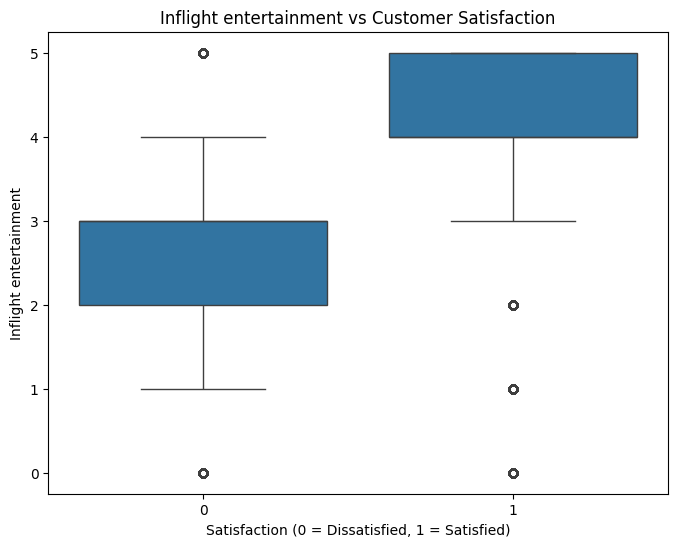

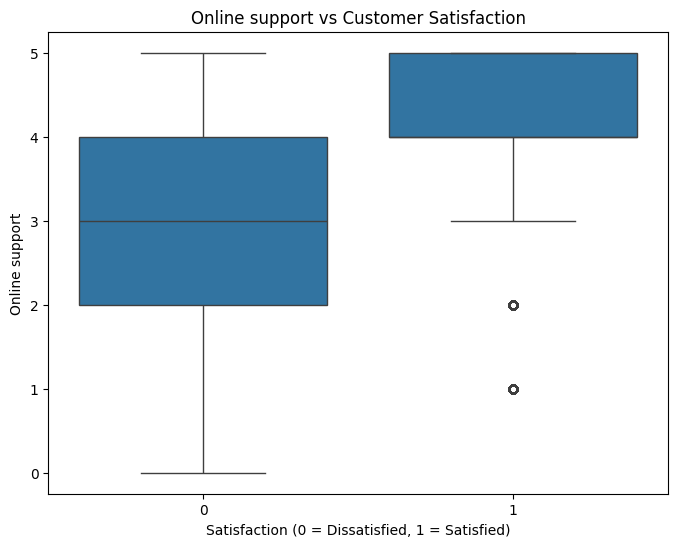

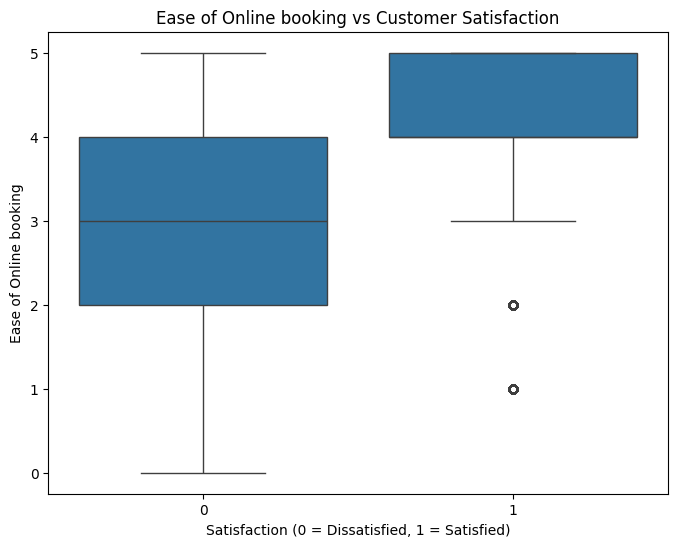

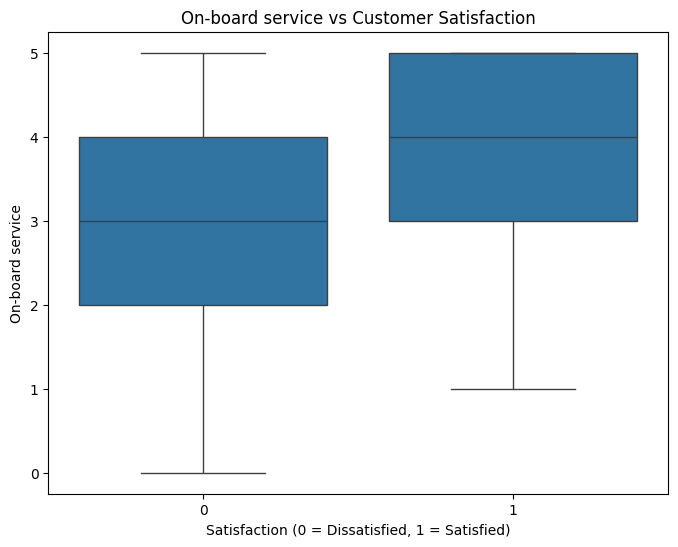

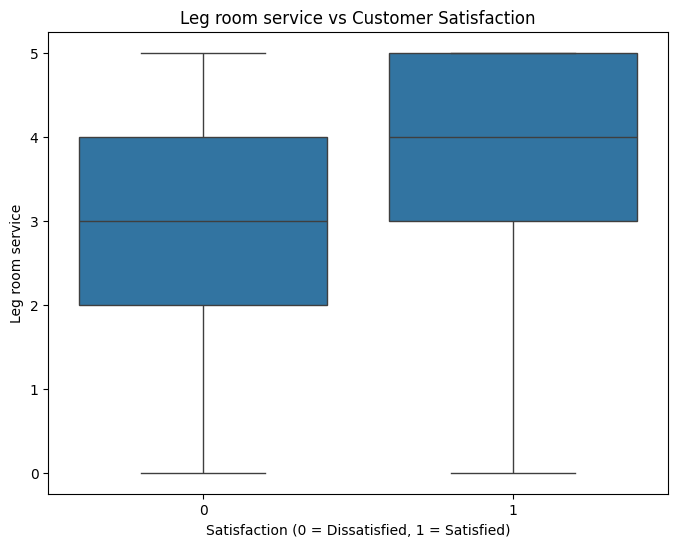

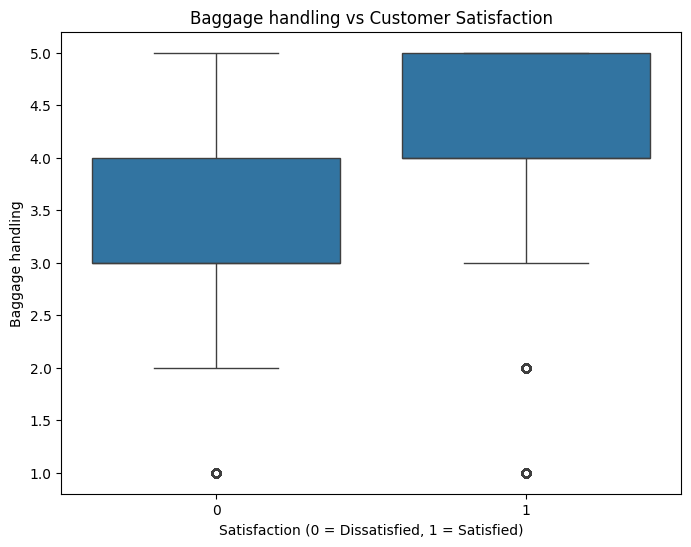

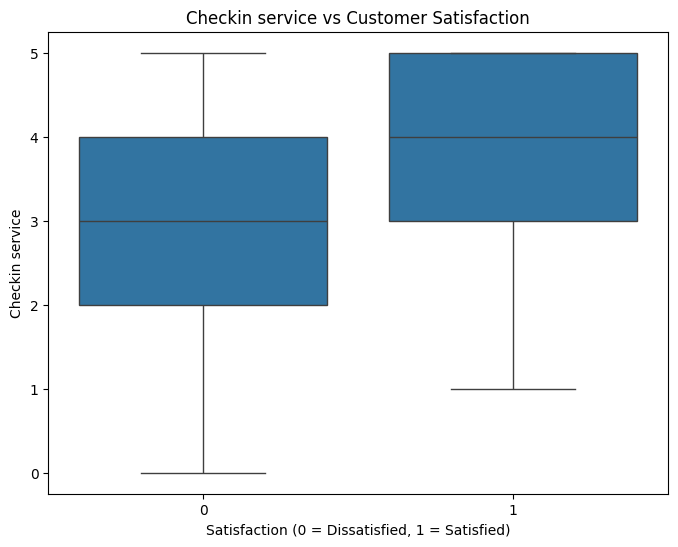

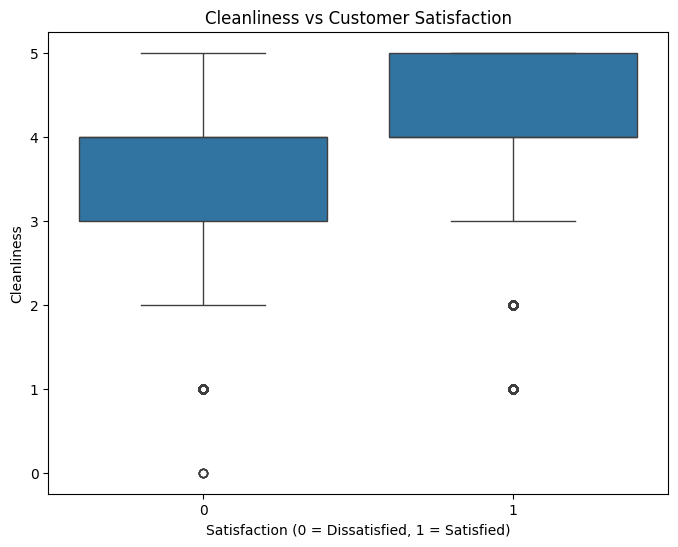

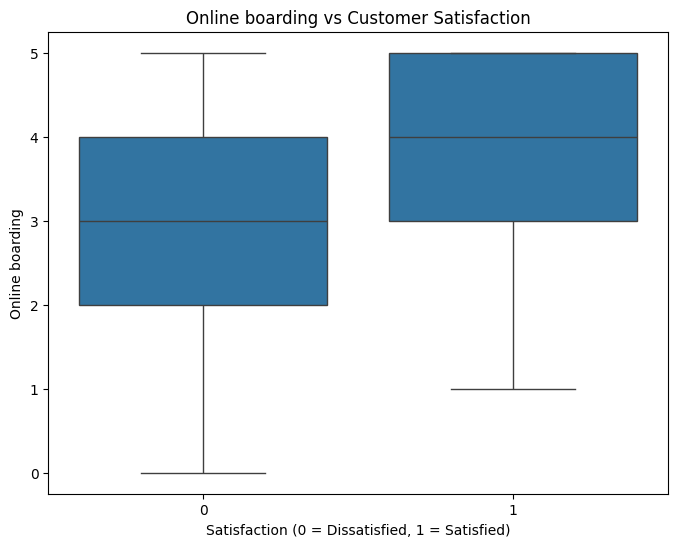

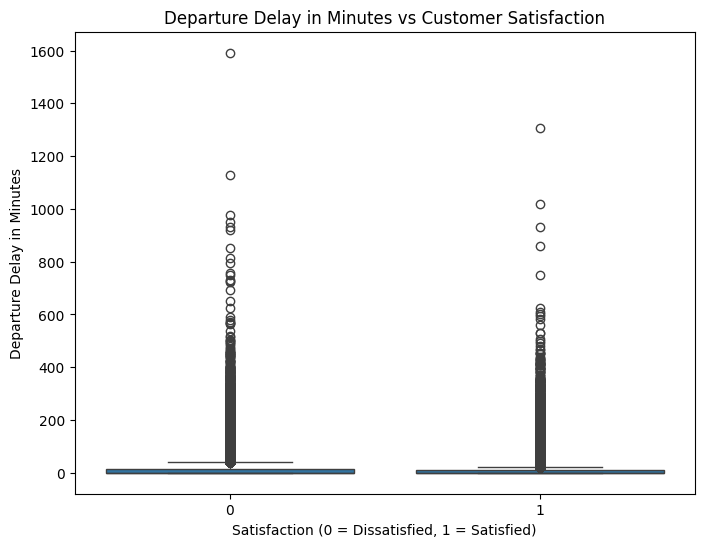

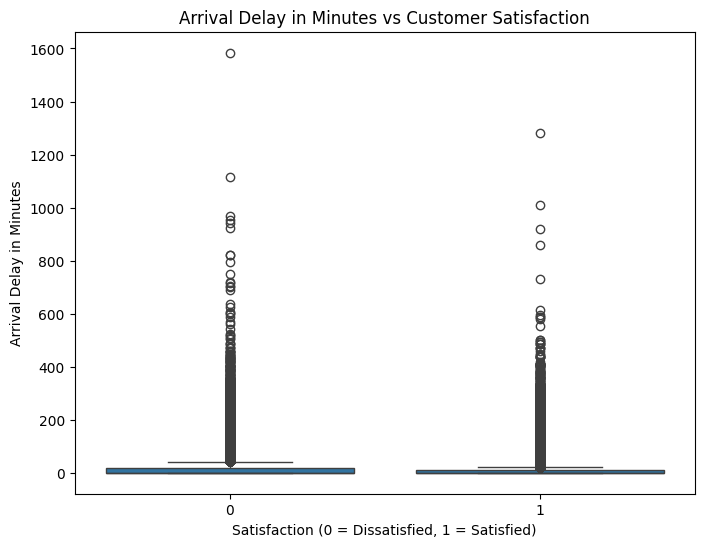

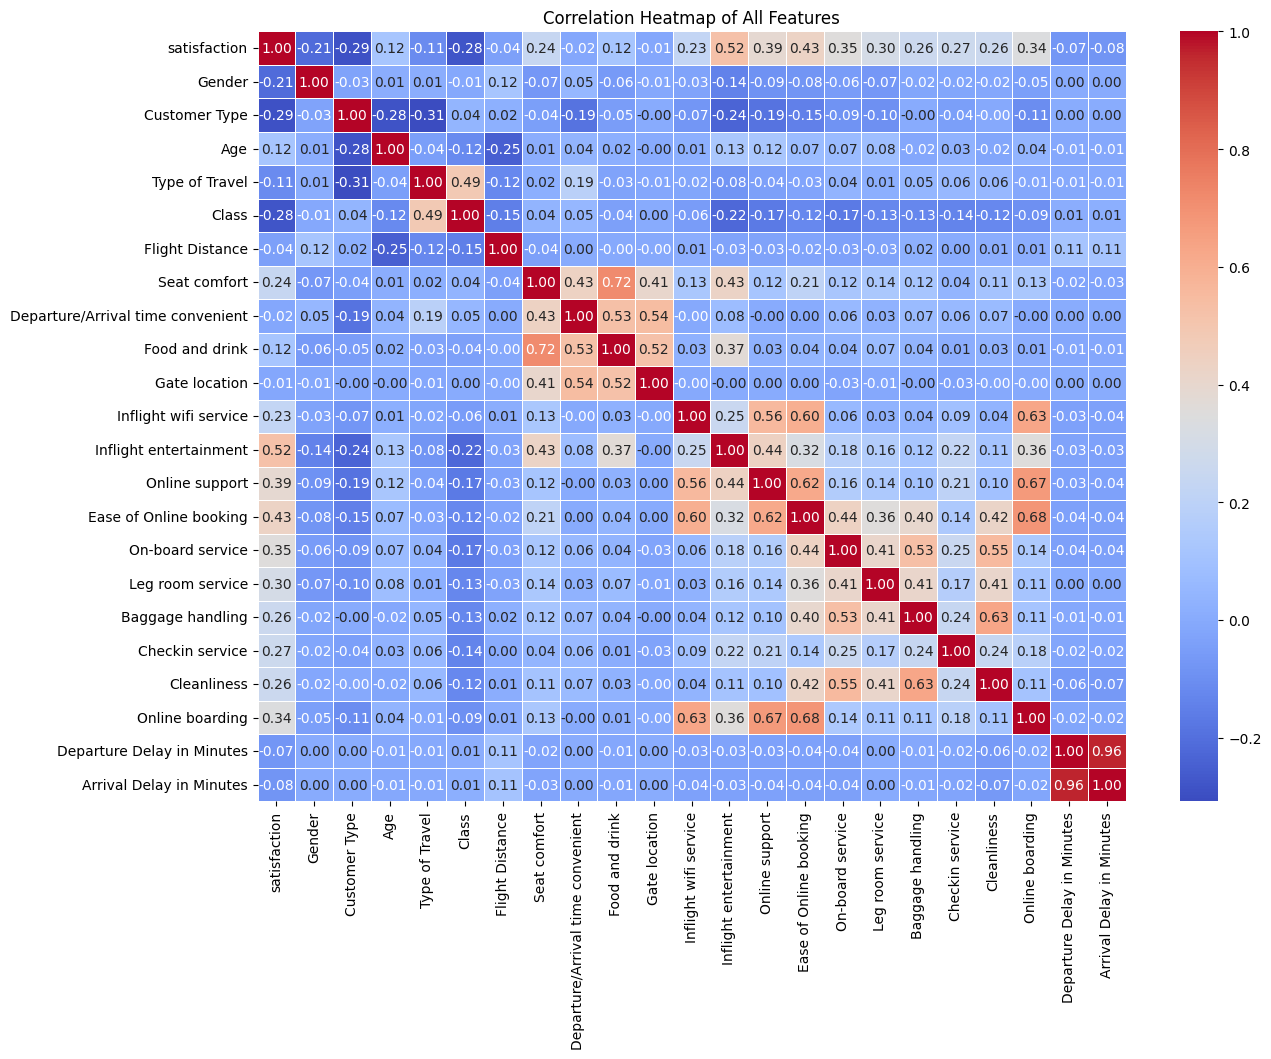


Model Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11675
           1       0.97      0.95      0.96     14301

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



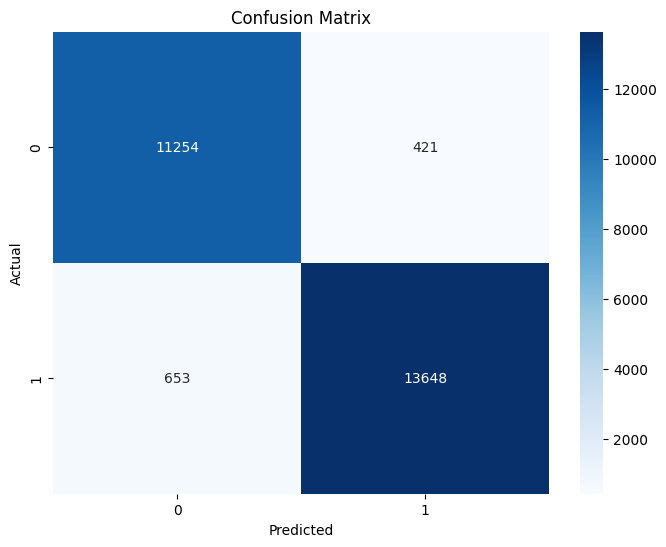

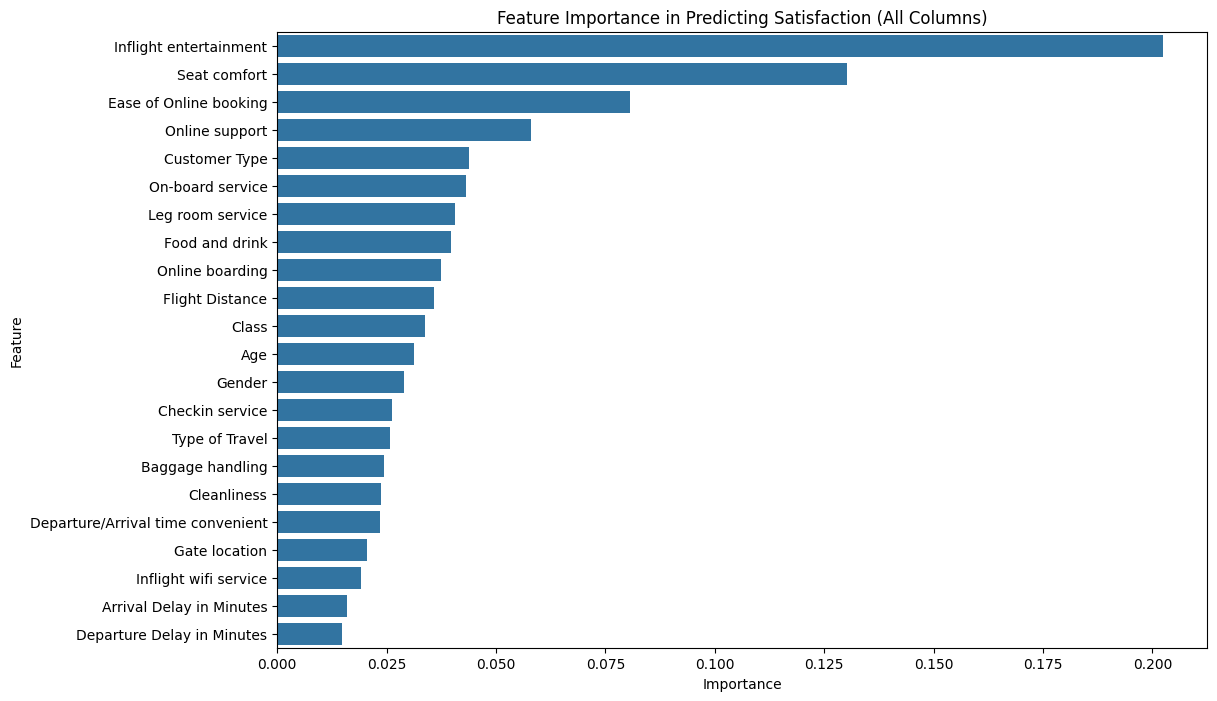

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('Invistico_Airline.csv')

# Display basic info
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

# Handle missing values (fill with median for numerical columns)
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median())

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Define features (all columns except satisfaction) and target
X = data.drop('satisfaction', axis=1)  # All 22 columns as features
y = data['satisfaction']  # Target (0 = dissatisfied, 1 = satisfied)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Visualizations for All Columns ---
# Categorical columns
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='satisfaction', data=data)
    plt.title(f'Customer Satisfaction by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Satisfaction', labels=['Dissatisfied', 'Satisfied'])
    plt.show()

# Numerical columns (box plots)
numerical_features = [
    'Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
    'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment',
    'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
    'Departure Delay in Minutes', 'Arrival Delay in Minutes'
]
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='satisfaction', y=feature, data=data)
    plt.title(f'{feature} vs Customer Satisfaction')
    plt.xlabel('Satisfaction (0 = Dissatisfied, 1 = Satisfied)')
    plt.ylabel(feature)
    plt.show()

# Correlation Heatmap (all features)
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

# --- Model Training ---
# Train Random Forest Classifier with all features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance (all features)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Predicting Satisfaction (All Columns)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()